In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np

os.chdir("../src/")

from dataset_util import Dataset
from matplotlib import pyplot as plt

ds = Dataset()

1. 引入特征
4. 数据集分割
1. 调参
2. 模型加深


In [2]:
ds.train = pd.merge(ds.train, ds.label, on="sequence")

<AxesSubplot:xlabel='count', ylabel='mean'>

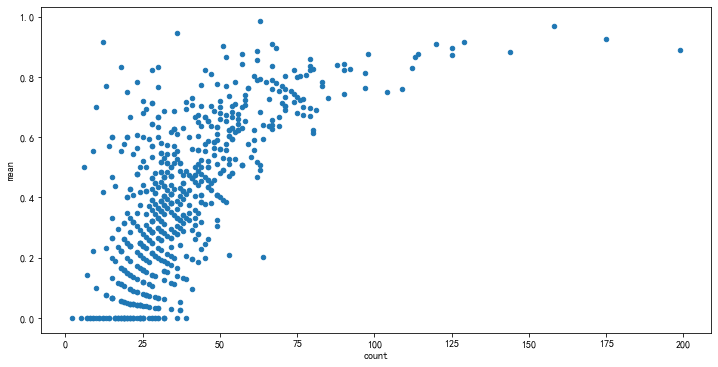

In [3]:
temp = ds.train[["sequence", "subject", "state"]].drop_duplicates()

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
temp.groupby("subject").agg(
    mean=("state", "mean"), count=("state", "count")
).sort_values("count").plot.scatter(x="count", y="mean", ax=ax)

In [14]:
train = ds.train.copy()
for sensor in range(13):
    col = f"sensor{sensor:02}"
    train[f"{col}_lag1"] = train.groupby("sequence")[col].shift(1)

In [13]:
train.sensor10

0         -0.985069
1          0.082733
2          0.449221
3         -0.434290
4          0.812631
             ...   
1558075   -0.723536
1558076    0.691407
1558077    0.716855
1558078   -0.914914
1558079   -0.418516
Name: sensor10, Length: 1558080, dtype: float64